In [1]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys:{}'.format(cancer.keys()))

cancer.keys:dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
print('cancer data shape:{}'.format(cancer['data'].shape))
print('cancer feature name:{} '.format(cancer['feature_names']))
print('cancer feature names shape:{}'.format(cancer['feature_names'].shape))

cancer data shape:(569, 30)
cancer feature name:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 
cancer feature names shape:(30,)


In [4]:
import numpy as np
print('sample count per class:{}'.format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

sample count per class:{'malignant': 212, 'benign': 357}


In [5]:
print(np.bincount(cancer.target))
print(np.bincount([1,2,3,4,1,2,4,3,1,2,1,2]))

[212 357]
[0 4 4 2 2]


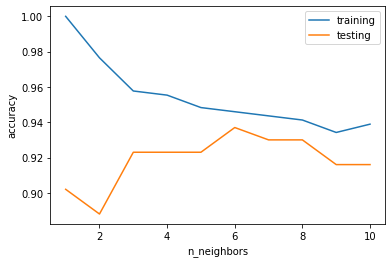

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
train_accuracy=[]
test_accuracy=[]
n_neighbor=range(1,11)
for n_neighbors in n_neighbor:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train,y_train)
    test_accuracy.append(knn.score(x_test,y_test))
    train_accuracy.append(knn.score(x_train,y_train))
plt.plot(n_neighbor,train_accuracy,label='training')
plt.plot(n_neighbor,test_accuracy,label='testing')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
export_graphviz(tree,out_file='tree.dot',class_names=['malligant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)
print('test accuracy:',tree.score(x_test,y_test))
print('train accuracy:',tree.score(x_test,y_test))
tree=DecisionTreeClassifier(max_depth=4,random_state=0).fit(x_train,y_train)
export_graphviz(tree,out_file='tree.dot',class_names=['malligant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)
print('test accuracy:',tree.score(x_test,y_test))
print('train accuracy:',tree.score(x_test,y_test))


test accuracy: 0.8811188811188811
train accuracy: 0.8811188811188811
test accuracy: 0.9020979020979021
train accuracy: 0.9020979020979021


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malligant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [13]:
print('tree feature importance:',tree.feature_importances_)

tree feature importance: [0.         0.         0.         0.         0.         0.
 0.         0.72099985 0.         0.         0.         0.
 0.02007711 0.01727487 0.         0.         0.         0.
 0.0124106  0.         0.         0.05097828 0.         0.11722141
 0.         0.03525964 0.01026499 0.         0.         0.01551325]


30


<BarContainer object of 30 artists>

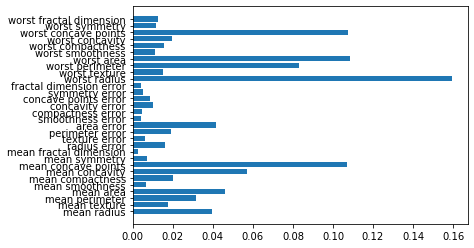

In [15]:
from sklearn.ensemble import RandomForestClassifier

n_features=cancer.data.shape[1]
print(n_features)
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

forest=RandomForestClassifier(n_estimators=100,random_state=2).fit(x_train,y_train)
plt.yticks(range(len(cancer.feature_names)),cancer.feature_names)
plt.barh(range(len(forest.feature_importances_)),forest.feature_importances_,align='center')